# 3.2.1 Introduction

# Introduction to ETL Pipelines

## Data Pipelines: ETL vs ELT
Data pipeline is a generic term for moving data from one place to another. For example, it could be moving data from one server to another server.

## ETL
An ETL pipeline is a specific kind of data pipeline and very common. ETL stands for Extract, Transform, Load. Imagine that you have a database containing web log data. Each entry contains the IP address of a user, a timestamp, and the link that the user clicked.
- https://en.wikipedia.org/wiki/Extract,_transform,_load
- https://en.wikipedia.org/wiki/Log_file

What if your company wanted to run an analysis of links clicked by city and by day? You would need another data set that maps IP address to a city, and you would also need to extract the day from the timestamp. With an ETL pipeline, you could run code once per day that would extract the previous day's log data, map IP address to city, aggregate link clicks by city, and then load these results into a new database. That way, a data analyst or scientist would have access to a table of log data by city and day. That is more convenient than always having to run the same complex data transformations on the raw web log data.

Before cloud computing, businesses stored their data on large, expensive, private servers. Running queries on large data sets, like raw web log data, could be expensive both economically and in terms of time. But data analysts might need to query a database multiple times even in the same day; hence, pre-aggregating the data with an ETL pipeline makes sense.

## ELT
ELT (extract, load, transform) pipelines have gained traction since the advent of cloud computing. Cloud computing has lowered the cost of storing data and running queries on large, raw data sets. Many of these cloud services, like Amazon Redshift, Google BigQuery, or IBM Db2 can be queried using SQL or a SQL-like language. With these tools, the data gets extracted, then loaded directly, and finally transformed at the end of the pipeline.

However, ETL pipelines are still used even with these cloud tools. Oftentimes, it still makes sense to run ETL pipelines and store data in a more readable or intuitive format. This can help data analysts and scientists work more efficiently as well as help an organization become more data driven.

# 3.2.2 Lesson Overview

## Outline of the Lesson
1. Extract data from different sources such as:
  - csv files
  - json files
  - APIs
2. Transform data
  - combining data from different sources
  - data cleaning
  - data types
  - parsing dates
  - file encodings
  - missing data
  - duplicate data
  - dummy variables
  - remove outliers
  - scaling features
  - engineering features
3. Load
  - send the transformed data to a database
4. ETL Pipeline
  - code an ETL pipeline

This lesson contains many Jupyter notebook exercises where you can practice the different parts of an ETL pipeline. Some of the exercises are challenging, but they also contain hints to help you get through them. You'll notice that the "transformation" section is relatively long. You'll oftentimes hear data scientists say that cleaning and transforming data is how they spend a majority of their time. This lesson reflects that reality.

## Big Data Courses at Udacity
"Big Data" gets a lot of buzz these days, and it is definitely an important part of a data engineer's and, sometimes, a data scientists's work. With "Big Data", you need special tools that can work on distributed computer systems.

This ETL course focuses on the practical fundamentals of ETL. Hence, you'll be working with a local data set so that you do not need to worry about learning a new tool. Udacity has other courses where the primary focus is on tools used for distributed data sets.

Here are links to other big data courses at Udacity:
- Intro to Hadoop and MapReduce
  - https://www.udacity.com/course/intro-to-hadoop-and-mapreduce--ud617
- Deploying a Hadoop Cluster
  - https://www.udacity.com/course/deploying-a-hadoop-cluster--ud1000
- Real-time Analytics with Apache Storm
  - https://www.udacity.com/course/real-time-analytics-with-apache-storm--ud381
- Big Data Analytics in Health Care
  - https://www.udacity.com/course/big-data-analytics-in-healthcare--ud758

# 3.2.3 World Bank Datasets

## World Bank Data
In the next section, you'll find a series of exercises. These are relatively brief and focus on extracting, or in other words, reading in data from different sources. The goal is to familiarize yourself with different types of files and see how the same data can be formatted in different ways. This lesson assumes you have experience with pandas and basic programming skills.

This lesson uses data from the World Bank. The data comes from two sources:
1. World Bank Indicator Data - This data contains socio-economic indicators for countries around the world. A few example indicators include population, arable land, and central government debt.
  - https://data.worldbank.org/indicator
2. World Bank Project Data - This data set contains information about World Bank project lending since 1947.
  - https://datacatalog.worldbank.org/dataset/world-bank-projects-operations
Both of these data sets are available in different formats including as a csv file, json, or xml. You can download the csv directly or you can use the World Bank APIs to extract data from the World Bank's servers. You'll be doing both in this lesson.

The end goal is to clean these data sets and bring them together into one table. As you'll see, it's not as easy as one might hope. By the end of the lesson, you'll have written an ETL pipeline to extract, transform, and load this data into a new database.

The goal of the lesson is to combine these data sets together so that you can run a linear regression model predicting World Bank Project total costs. You will not actually build the model; instead, you will get the data ready so that a data analyst or data scientist could more easily build the model.

 # 3.2.4 How to Tackle the Exercises

## How to Tackle the Exercises
This course assumes you have experience manipulating data with the Pandas library, which is covered in the data analyst nanodegree. Some of these transformation exercises are challenging. The most challenging exercises are marked (challenging). If an exercise is marked as a challenge, it means you’ll get something out of solving it, but it’s not essential for understanding the lesson material or for getting through the final project at the end of this data engineering course.

Throughout the exercises, you might have to read the pandas documentation or search outside the classroom for how to do a certain processing technique. That is not just expected but also encouraged. As a data scientist professional, you will oftentimes have to research how to do something on your own much like what software engineers do. See this answer on Quora about how often do people use stackoverflow when working on data science projects?.
- https://www.quora.com/How-often-do-people-use-stackoverflow-when-working-on-data-science-projects

Use Google and other search engines when you're not sure how to do something!

## What You Will do in the Next Section
In the next section of the lesson, you'll learn about the extract portion of an ETL pipeline. You’ll get practice with a series of exercises. These exercises are relatively brief and focus on extracting, or in other words, reading in data from different sources. The goal is to familiarize yourself with different types of files and see how the same data can be formatted in different ways.

For a review of pandas, click on the "Extracurricular" section of the classroom. Open the Prerequisite: Python for Data Analysis course, and go to Lesson 7: Pandas.

# 3.2.5 Extract

## Extract

## Overview of the Extract Part of the Lesson

## Summary of the data file types you'll work with

### CSV files
CSV stands for comma-separated values. These types of files separate values with a comma, and each entry is on a separate line. Oftentimes, the first entry will contain variable names. Here is an example of what CSV data looks like. This is an abbreviated version of the first three lines in the World Bank projects data csv file.
```
id,regionname,countryname,prodline,lendinginstr
P162228,Other,World;World,RE,Investment Project Financing
P163962,Africa,Democratic Republic of the Congo;Democratic Republic of the Congo,PE,Investment Project Financing
```

### JSON
JSON is a file format with key/value pairs. It looks like a Python dictionary. The exact same CSV file represented in JSON could look like this:
```json
[{"id":"P162228","regionname":"Other","countryname":"World;World","prodline":"RE","lendinginstr":"Investment Project Financing"},{"id":"P163962","regionname":"Africa","countryname":"Democratic Republic of the Congo;Democratic Republic of the Congo","prodline":"PE","lendinginstr":"Investment Project Financing"},{"id":"P167672","regionname":"South Asia","countryname":"People\'s Republic of Bangladesh;People\'s Republic of Bangladesh","prodline":"PE","lendinginstr":"Investment Project Financing"}]
```
Each line in the data is inside of a squiggly bracket {}. The variable names are the keys, and the variable values are the values.

There are other ways to organize JSON data, but the general rule is that JSON is organized into key/value pairs. For example, here is a different way to represent the same data using JSON:
```json
{"id":{"0":"P162228","1":"P163962","2":"P167672"},"regionname":{"0":"Other","1":"Africa","2":"South Asia"},"countryname":{"0":"World;World","1":"Democratic Republic of the Congo;Democratic Republic of the Congo","2":"People\'s Republic of Bangladesh;People\'s Republic of Bangladesh"},"prodline":{"0":"RE","1":"PE","2":"PE"},"lendinginstr":{"0":"Investment Project Financing","1":"Investment Project Financing","2":"Investment Project Financing"}}
```
### XML
Another data format is called XML (Extensible Markup Language). XML is very similar to HTML at least in terms of formatting. The main difference between the two is that HTML has pre-defined tags that are standardized. In XML, tags can be tailored to the data set. Here is what this same data would look like as XML.
```xml
<ENTRY>
  <ID>P162228</ID>
  <REGIONNAME>Other</REGIONNAME>
  <COUNTRYNAME>World;World</COUNTRYNAME>
  <PRODLINE>RE</PRODLINE>
  <LENDINGINSTR>Investment Project Financing</LENDINGINSTR>
</ENTRY>
<ENTRY>
  <ID>P163962</ID>
  <REGIONNAME>Africa</REGIONNAME>
  <COUNTRYNAME>Democratic Republic of the Congo;Democratic Republic of the Congo</COUNTRYNAME>
  <PRODLINE>PE</PRODLINE>
  <LENDINGINSTR>Investment Project Financing</LENDINGINSTR>
</ENTRY>
<ENTRY>
  <ID>P167672</ID>
  <REGIONNAME>South Asia</REGIONNAME>
  <COUNTRYNAME>People's Republic of Bangladesh;People's Republic of Bangladesh</COUNTRYNAME>
  <PRODLINE>PE</PRODLINE>
  <LENDINGINSTR>Investment Project Financing</LENDINGINSTR>
</ENTRY>
```
XML is falling out of favor especially because JSON tends to be easier to navigate; however, you still might come across XML data. The World Bank API, for example, can return either XML data or JSON data. From a data perspective, the process for handling HTML and XML data is essentially the same.

### SQL databases
SQL databases store data in tables using primary and foreign keys. In a SQL database, the same data would look like this:
- https://docs.microsoft.com/en-us/sql/relational-databases/tables/primary-and-foreign-key-constraints?view=sql-server-2017

| id | regionname | countryname | prodline | lendinginstr |
| --- | --- | --- | --- | --- |
| P162228 | Other | World;World	RE | Investment | Project Financing |
| P163962 | Africa | Democratic Republic of the Congo;Democratic Republic of the Congo | PE | Investment Project Financing |
| P167672 | South Asia | People's Republic of Bangladesh;People's Republic of Bangladesh | PE | Investment Project Financing |

### Text Files
This course won't go into much detail about text data. There are other Udacity courses, namely on natural language processing, that go into the details of processing text for machine learning.

Text data present their own issues. Whereas CSV, JSON, XML, and SQL data are organized with a clear structure, text is more ambiguous. For example, the World Bank project data country names are written like this
```
Democratic Republic of the Congo;Democratic Republic of the Congo
```
In the World Bank Indicator data sets, the Democratic Republic of the Congo is represented by the abbreviation "Congo, Dem. Rep." You'll have to clean these country names to join the data sets together.
- https://classroom.udacity.com/nanodegrees/nd025-ent/parts/6bb3fcfa-d138-46af-95b2-86350151cfe5/modules/f7cc9cca-a37b-4d8a-ba92-2b4edb90618d/lessons/013cd87c-acef-4cb1-b043-c47dbc4ef371/concepts/(https://data.worldbank.org/country/congo-dem-rep?view=chart

## Extracting Data from the Web
In this lesson, you'll see how to extract data from the web using an APIs (Application Programming Interface). APIs generally provide data in either JSON or XML format.

Companies and organizations provide APIs so that programmers can access data in an official, safe way. APIs allow you to download, and sometimes even upload or modify, data from a web server without giving you direct access.

# 3.2.6 Extracting data from csv

In [4]:
import pandas as pd
df_projects = pd.read_csv('3.2 Class Notebooks/1_csv_exercise/projects_data.csv', dtype=str)

In [5]:
# TODO: Run the cell below to see what the data looks like
df_projects.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,NaN


In [14]:
df_population = pd.read_csv('3.2 Class Notebooks/1_csv_exercise/population_data.csv', skiprows=4)

In [15]:
df_population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN


In [16]:
# No useful info
df_population = df_population.drop('Unnamed: 62', axis=1)
df_population[df_population.isnull().any(axis=1)]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
67,Eritrea,ERI,"Population, total",SP.POP.TOTL,1397491.0,1432640.0,1469645.0,1508273.0,1548187.0,1589179.0,...,4232636.0,4310334.0,4390840.0,4474690.0,NaN,NaN,NaN,NaN,NaN,NaN
108,Not classified,INX,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,Kuwait,KWT,"Population, total",SP.POP.TOTL,269618.0,301336.0,338296.0,379891.0,425235.0,473554.0,...,2652340.0,2818939.0,2998083.0,3191051.0,3395556.0,3598385.0,3782450.0,3935794.0,4052584.0,4136528.0
194,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,3596688.0,3702218.0,3811102.0,3927051.0,4046901.0,4169506.0,4294682.0,4422143.0,4551566.0,4684777.0
212,Serbia,SRB,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,7350222.0,7320807.0,7291436.0,7234099.0,7199077.0,7164132.0,7130576.0,7095383.0,7058322.0,7022268.0
223,Sint Maarten (Dutch part),SXM,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,33964.0,34238.0,34056.0,33435.0,34640.0,36607.0,37685.0,38824.0,39969.0,41109.0


# 3.2.7 Extract from JSON and XML

In [19]:
import pandas

path = '3.2 Class Notebooks/2_extract_exercise/population_data.json'
df_json = pd.read_json(path, orient='records')
df_json.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [20]:
import json

# read in the JSON file
path = '3.2 Class Notebooks/2_extract_exercise/population_data.json'
with open(path) as f:
    json_data = json.load(f)

# print the first record in the JSON file
print(json_data[0])
print('\n')

# show that JSON data is essentially a dictionary
print(json_data[0]['Country Name'])
print(json_data[0]['Country Code'])

{'Country Name': 'Aruba', 'Country Code': 'ABW', 'Indicator Name': 'Population, total', 'Indicator Code': 'SP.POP.TOTL', '1960': 54211.0, '1961': 55438.0, '1962': 56225.0, '1963': 56695.0, '1964': 57032.0, '1965': 57360.0, '1966': 57715.0, '1967': 58055.0, '1968': 58386.0, '1969': 58726.0, '1970': 59063.0, '1971': 59440.0, '1972': 59840.0, '1973': 60243.0, '1974': 60528.0, '1975': 60657.0, '1976': 60586.0, '1977': 60366.0, '1978': 60103.0, '1979': 59980.0, '1980': 60096.0, '1981': 60567.0, '1982': 61345.0, '1983': 62201.0, '1984': 62836.0, '1985': 63026.0, '1986': 62644.0, '1987': 61833.0, '1988': 61079.0, '1989': 61032.0, '1990': 62149.0, '1991': 64622.0, '1992': 68235.0, '1993': 72504.0, '1994': 76700.0, '1995': 80324.0, '1996': 83200.0, '1997': 85451.0, '1998': 87277.0, '1999': 89005.0, '2000': 90853.0, '2001': 92898.0, '2002': 94992.0, '2003': 97017.0, '2004': 98737.0, '2005': 100031.0, '2006': 100832.0, '2007': 101220.0, '2008': 101353.0, '2009': 101453.0, '2010': 101669.0, '2011'

In [31]:
def print_lines(N, path):
    with open(path) as myfile:
        head = [next(myfile) for x in range(N)]
    print(*head, sep='\n')

In [32]:
path = '3.2 Class Notebooks/2_extract_exercise/population_data.xml'
N = 15
print_lines(N, path)

﻿<?xml version="1.0" encoding="utf-8"?>

<Root xmlns:wb="http://www.worldbank.org">

  <data>

    <record>

      <field name="Country or Area" key="ABW">Aruba</field>

      <field name="Item" key="SP.POP.TOTL">Population, total</field>

      <field name="Year">1960</field>

      <field name="Value">54211</field>

    </record>

    <record>

      <field name="Country or Area" key="ABW">Aruba</field>

      <field name="Item" key="SP.POP.TOTL">Population, total</field>

      <field name="Year">1961</field>

      <field name="Value">55438</field>

    </record>



In [49]:
from bs4 import BeautifulSoup

# pip install lxml

# open the population_data.xml file and load into Beautiful Soup
with open(path) as fp:
    # soup = BeautifulSoup(fp, "lxml") # lxml is the Parser type
    soup = BeautifulSoup(fp, 'html.parser')

In [50]:
# output the first 5 records in the xml file
# this is an example of how to navigate with BeautifulSoup

i = 0
# use the find_all method to get all record tags in the document
for record in soup.find_all('record'):
    # use the find_all method to get all fields in each record
    i += 1
    for record in record.find_all('field'):
        print(record['name'], ': ' , record.text)
    print()
    if i == 5:
        break

Country or Area :  Aruba
Item :  Population, total
Year :  1960
Value :  54211

Country or Area :  Aruba
Item :  Population, total
Year :  1961
Value :  55438

Country or Area :  Aruba
Item :  Population, total
Year :  1962
Value :  56225

Country or Area :  Aruba
Item :  Population, total
Year :  1963
Value :  56695

Country or Area :  Aruba
Item :  Population, total
Year :  1964
Value :  57032



# 3.2.8 Extract Data from SQL Databases

In [58]:
# SQLite3 and Pandas

import sqlite3
import pandas as pd

db_path = '3.2 Class Notebooks/3_sql_exercise/population_data.db'

# connect to the database
conn = sqlite3.connect(db_path)

# run a query
pd.read_sql('SELECT * FROM population_data', conn)

,index,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


In [68]:
import pandas as pd
from sqlalchemy import create_engine
import os

path = '3.2 Class Notebooks/3_sql_exercise/population_data.db'
sqlite_path = os.getcwd() + path
engine = create_engine('sqlite:///' + path)
connection = engine.raw_connection()
pd.read_sql("SELECT * FROM population_data", connection)

,index,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


# 3.2.9 Extracting Text Data

## Text Data
Text data can come in different forms. A text file (.txt), for example, will contain only text. As another example, a data set might contain text for one or more variables. In the world bank projects data set, the regionname, countryname, theme and sector variables contain text.

Analyzing text is a big topic that is covered in other Udacity courses on Natural Language Processing. For the purposes of this lesson on ETL pipelines, pandas is automatically "extracting" text data when reading in a csv, xml or json file.

Text data will be more important in the Transform stage of an ETL pipeline, which comes later in the lesson.

# 3.2.10 APIs

## Example Indicators API

Run the code example below to request data from the World Bank Indicators API. According to the documntation, you format your request url like so:

`http://api.worldbank.org/v2/countries/` + list of country abbreviations separated by ; + `/indicators/` + indicator name + `?` + options

where options can include
* per_page - number of records to return per page
* page - which page to return - eg if there are 5000 records and 100 records per page
* date - filter by dates
* format - json or xml
 
 and a few other options that you can read about [here](https://datahelpdesk.worldbank.org/knowledgebase/articles/898581-api-basic-call-structure).

In [82]:
import requests
import pandas as pd

url = 'http://api.worldbank.org/v2/countries/br;cn;us;de/indicators/SP.POP.TOTL/?format=json&per_page=1000'
r = requests.get(url)
print(r.json()[0])
print()
print(r.json()[1][0:4])

{'page': 1, 'pages': 1, 'per_page': 1000, 'total': 240, 'sourceid': '24', 'lastupdated': '2020-02-27'}

[{'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': 'BR', 'value': 'Brazil'}, 'countryiso3code': 'BRA', 'date': '2019', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': 'BR', 'value': 'Brazil'}, 'countryiso3code': 'BRA', 'date': '2018', 'value': 209469333, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': 'BR', 'value': 'Brazil'}, 'countryiso3code': 'BRA', 'date': '2017', 'value': 207833831, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': 'BR', 'value': 'Brazil'}, 'countryiso3code': 'BRA', 'date': '2016', 'value': 206163058, 'unit': '', 'obs_status': '', 'decimal': 0}]


In [83]:
pd.DataFrame(r.json()[1])

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2019,NaN,,,0
1,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2018,209469333.0,,,0
2,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2017,207833831.0,,,0
3,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2016,206163058.0,,,0
4,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2015,204471769.0,,,0
...,...,...,...,...,...,...,...,...
235,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'US', 'value': 'United States'}",USA,1964,191889000.0,,,0
236,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'US', 'value': 'United States'}",USA,1963,189242000.0,,,0
237,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'US', 'value': 'United States'}",USA,1962,186538000.0,,,0
238,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'US', 'value': 'United States'}",USA,1961,183691000.0,,,0


# 3.2.11 Transform

## Transform

## Overview of the Transform Part of the Lesson

# 3.2.11 Combining Data

## Pandas Resources for Quick Review
- 10 minute Intro to Pandas
  - https://pandas.pydata.org/pandas-docs/stable/10min.html
- Pandas Basic Functionality
  - https://pandas.pydata.org/pandas-docs/stable/basics.html

# 3.2.12 Combining Data

In [85]:
import pandas as pd

path = '3.2 Class Notebooks/5_combinedata_exercise/'

# TODO: read in each csv file into a separate variable
# HINT: remember from the Extract material that these csv file have some formatting issues
df_rural = pd.read_csv(path + 'rural_population_percent.csv', skiprows=4)
df_electricity = pd.read_csv(path + 'electricity_access_percent.csv', skiprows=4)

# TODO: remove the 'Unnamed:62' column from each data set
df_rural.drop('Unnamed: 62', axis=1, inplace=True)
df_electricity.drop('Unnamed: 62', axis=1, inplace=True)

# TODO: combine the two data sets together using the concat method
# In other words, all of the words of df_rural will come first
# followed by all the rows in df_electricity. This is possible to do
# because they both have the same column names.
df = pd.concat([df_rural, df_electricity])
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.217,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,76.054,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,61.491,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,50.009,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.133,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873


In [87]:
'''
This exercise is more challenging. 
Combine the data in the csv file together to the output that look like the following:

|Country Name|Country Code|Year|Rural_Value|Electricity_Value| 
|--|--|--|--|--|--| 
|Aruba|ABW|1960|49.224|49.239| 
... 
etc.

Order the results in the dataframe by country and then by year

Here are a few pandas methods that should be helpful:
- melt
- merge
- sort_values

HINT: You can use country name, country code, and the year as common keys between the data sets
'''

# TODO: merge the data sets together according to the instructions. First, use the 
# melt method to change the formatting of each data frame so that it looks like this:
# Country Name, Country Code, Year, Rural Value
# Country Name, Country Code, Year, Electricity Value

df_rural_melt = pd.melt(df_rural,\
                        id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],\
                       var_name = 'Year', value_name='Electricity_Value')
df_electricity_melt = pd.melt(df_electricity,\
                              id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],\
                             var_name='Year', value_name='Rural_Value')

# TODO: drop any columns from the data frames that aren't needed
df_rural_melt.drop(['Indicator Name', 'Indicator Code'], axis=1, inplace=True)
df_electricity_melt.drop(['Indicator Name', 'Indicator Code'], axis=1, inplace=True)

# TODO: merge the data frames together based on their common columns
# in this case, the common columns are Country Name, Country Code, and Year
df_merge = df_rural_melt.merge(df_electricity_melt, how='outer',\
                               on=['Country Name', 'Country Code', 'Year'])

# TODO: sort the results by country and then by year
df_combined = df_merge.sort_values(['Country Name', 'Year'])
df_combined.head()

,Country Name,Country Code,Year,Electricity_Value,Rural_Value
1,Afghanistan,AFG,1960,91.779,NaN
265,Afghanistan,AFG,1961,91.492,NaN
529,Afghanistan,AFG,1962,91.195,NaN
793,Afghanistan,AFG,1963,90.890,NaN
1057,Afghanistan,AFG,1964,90.574,NaN


# 3.2.14 Cleaning Data

# 3.2.15 Cleaning Data Exercise

In [91]:
import pandas as pd

path = '3.2 Class Notebooks/'

# read in the population data and drop the final column
df_indicator = pd.read_csv(path + 'data/population_data.csv', skiprows=4)
df_indicator.drop(['Unnamed: 62'], axis=1, inplace=True)

# read in the projects data set with all columns type string
df_projects = pd.read_csv(path + 'data/projects_data.csv', dtype=str)
df_projects.drop(['Unnamed: 56'], axis=1, inplace=True)

# You'll notice a few values that represent world regions 
# such as 'East Asia & Pacific' and 'East Asia & Pacific (excluding high income)'.
df_indicator[['Country Name', 'Country Code']].drop_duplicates()

df_projects['countryname'].unique()[:10]

array(['World;World',
       'Democratic Republic of the Congo;Democratic Republic of the Congo',
       "People's Republic of Bangladesh;People's Republic of Bangladesh",
       'Islamic  Republic of Afghanistan;Islamic  Republic of Afghanistan',
       'Federal Republic of Nigeria;Federal Republic of Nigeria',
       'Republic of Tunisia;Republic of Tunisia',
       'Lebanese Republic;Lebanese Republic',
       'Democratic Socialist Republic of Sri Lan;Democratic Socialist Republic of Sri Lan',
       'Nepal;Nepal', 'Kyrgyz Republic;Kyrgyz Republic'], dtype=object)

In [103]:
df_projects['Official Country Name'] = df_projects['countryname'].str.split(';').str.get(0)

In [104]:
from pycountry import countries

print(countries.get(name='Spain'))

print(countries.lookup('Kingdom of Spain'))

Country(alpha_2='ES', alpha_3='ESP', name='Spain', numeric='724', official_name='Kingdom of Spain')
Country(alpha_2='ES', alpha_3='ESP', name='Spain', numeric='724', official_name='Kingdom of Spain')


In [106]:
# set up the libraries and variables
from collections import defaultdict
country_not_found = [] # stores countries not found in the pycountry library
project_country_abbrev_dict = defaultdict(str) # set up an empty dictionary of string values

# TODO: iterate through the country names in df_projects. 
# Create a dictionary mapping the country name to the alpha_3 ISO code
for country in df_projects['Official Country Name'].drop_duplicates().sort_values():
    try: 
        # TODO: look up the country name in the pycountry library
        # store the country name as the dictionary key and the ISO-3 code as the value
        project_country_abbrev_dict[country] = None
    except:
        # If the country name is not in the pycountry library, then print out the country name
        # And store the results in the country_not_found list
        print(country, ' not found')
        country_not_found.append(country)
        

[]


In [108]:
# Just in case anything is in country_not_found

# Run this cell to iterate through the country_not_found list and check if the country name is in the df_indicator data set
indicator_countries = df_indicator[['Country Name', 'Country Code']].drop_duplicates().sort_values(by='Country Name')

for country in country_not_found:
    if country in indicator_countries['Country Name'].tolist():
        print(country)

In [110]:
# TODO: Use the project_country_abbrev_dict and the df_projects['Country Name'] column to make a new column
# of the alpha-3 country codes. This new column should be called 'Country Code'.

df_projects['Country Code'] = df_projects['Official Country Name'].apply(lambda x: project_country_abbrev_dict[x])

# Run this code cell to see which projects in the df_projects data frame still have no country code abbreviation.
# In other words, these projects do not have a matching population value in the df_indicator data frame.
df_projects[df_projects['Country Code'] == '']

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Official Country Name,Country Code


# 3.2.16 Data Types

In [134]:
import pandas as pd

path = '3.2 Class Notebooks/'

# read in the population data and drop the final column
df_indicator = pd.read_csv(path + 'data/population_data.csv', skiprows=4)
df_indicator.drop(['Unnamed: 62'], axis=1, inplace=True)

# read in the projects data set with all columns type string
df_projects = pd.read_csv(path + 'data/projects_data.csv', dtype=str)
df_projects.drop(['Unnamed: 56'], axis=1, inplace=True)

df_indicator.dtypes.unique()

array([dtype('O'), dtype('float64')], dtype=object)

In [135]:
# TODO: Calculate the population sum by year for Canada,
#       the United States, and Mexico.

# the keepcol variable makes a list of the column names to keep. You can use this if you'd like
keepcol = ['Country Name']
for i in range(1960, 2018, 1):
    keepcol.append(str(i))

# TODO: In the df_nafta variable, store a data frame that only contains the rows for 
#      Canada, United States, and Mexico.
df_nafta = None


# TODO: Calculate the sum of the values in each column in order to find the total population by year.
# You can use the keepcol variable if you want to control which columns get outputted

In [136]:
# TODO: Calculate the population sum by year for Canada,
#       the United States, and Mexico.


# 
keepcol = ['Country Name']
for i in range(1960, 2018, 1):
    keepcol.append(str(i))

df_nafta = df_indicator[(df_indicator['Country Name'] == 'Canada') | 
             (df_indicator['Country Name'] == 'United States') | 
            (df_indicator['Country Name'] == 'Mexico')].iloc[:,]

df_nafta.sum(axis=0)[keepcol][-10:]

2008    4.51002e+08
2009    4.55905e+08
2010    4.60663e+08
2011    4.65077e+08
2012    4.69572e+08
2013    4.73923e+08
2014    4.78379e+08
2015    4.82763e+08
2016    4.87211e+08
2017    4.91591e+08
dtype: object

In [137]:
df_projects.dtypes.unique()

array([dtype('O')], dtype=object)

In [138]:
df_projects[['totalamt', 'lendprojectcost']].head()

,totalamt,lendprojectcost
0,0,"500,000"
1,"200,000,000","200,000,000"
2,"58,330,000","50,000,000"
3,"20,000,000","50,000,000"
4,"100,000,000","100,000,000"


In [139]:
# TODO: Convert the totalamt column from a string to a float and save the results back into the totalamt column

# Step 1: Remove the commas from the 'totalamt' column
# HINT: https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.str.replace.html

# Step 2: Convert the 'totalamt' column from an object data type (ie string) to an integer data type.
# HINT: https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.to_numeric.html

df_projects['totalamt'] = pd.to_numeric(df_projects['totalamt'].str.replace(',',""))

In [140]:
df_projects['totalamt'].head()

0            0
1    200000000
2     58330000
3     20000000
4    100000000
Name: totalamt, dtype: int64

Pandas has a few different methods for converting between data types, and here are link to the documentation:

* [astype](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.astype.html#pandas.DataFrame.astype)
* [to_datetime](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.to_datetime.html#pandas.to_datetime)
* [to_numeric](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.to_numeric.html#pandas.to_numeric)
* [to_timedelta](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.to_timedelta.html#pandas.to_timedelta)

# 3.2.17 Parsing Dates

In [157]:
import pandas as pd

parsed_date = pd.to_datetime('January 1st, 2017')
print(parsed_date)
print(parsed_date.month)
print(parsed_date.year)
print(parsed_date.second)
print()

parsed_date = pd.to_datetime('5/3/2017 5:30')
print(parsed_date.month)
print()

parsed_date = pd.to_datetime('3/5/2017 5:30', format='%d/%m/%Y %H:%M')
print(parsed_date.month)

2017-01-01 00:00:00
1
2017
0

5

5


In [158]:
path = '3.2 Class Notebooks/'

# read in the projects data set with all columns type string
df_projects = pd.read_csv(path + 'data/projects_data.csv', dtype=str)
df_projects.drop(['Unnamed: 56'], axis=1, inplace=True)

# Notice there are three columns associated with dates:
# boardapprovaldate, board_approval_month, and closingdate.

df_projects.head(15)[['boardapprovaldate', 'board_approval_month', 'closingdate']]

,boardapprovaldate,board_approval_month,closingdate
0,2018-06-28T00:00:00Z,June,NaN
1,2018-06-28T00:00:00Z,June,2023-12-31T00:00:00Z
2,2018-06-28T00:00:00Z,June,NaN
3,2018-06-27T00:00:00Z,June,2023-06-28T00:00:00Z
4,2018-06-27T00:00:00Z,June,2023-05-31T00:00:00Z
5,2018-06-27T00:00:00Z,June,2019-12-31T00:00:00Z
6,2018-06-27T00:00:00Z,June,2023-10-31T00:00:00Z
7,2018-06-27T00:00:00Z,June,2023-12-31T00:00:00Z
8,2018-06-27T00:00:00Z,June,2022-12-31T00:00:00Z
9,2018-06-27T00:00:00Z,June,2023-12-31T00:00:00Z


In [159]:
df_projects['boardapprovaldate'] = pd.to_datetime(df_projects['boardapprovaldate'])
df_projects['closingdate'] = pd.to_datetime(df_projects['closingdate'])

In [160]:
df_projects['boardapprovaldate'].dt.weekday

0        3.0
1        3.0
2        3.0
3        2.0
4        2.0
        ... 
18243    3.0
18244    3.0
18245    4.0
18246    3.0
18247    4.0
Name: boardapprovaldate, Length: 18248, dtype: float64

In [161]:
df_projects['approvalyear'] = df_projects['boardapprovaldate'].dt.year
df_projects['approvalday'] = df_projects['boardapprovaldate'].dt.day
df_projects['approvalweekday'] = df_projects['boardapprovaldate'].dt.weekday
df_projects['closingyear'] = df_projects['closingdate'].dt.year
df_projects['closingday'] = df_projects['closingdate'].dt.day
df_projects['closingweekday'] = df_projects['closingdate'].dt.weekday

df_projects.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,GeoLocName,Latitude,Longitude,Country,approvalyear,approvalday,approvalweekday,closingyear,closingday,closingweekday
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,2018.0,28.0,3.0,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,2018.0,28.0,3.0,2023.0,31.0,6.0
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,2018.0,28.0,3.0,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,2018.0,27.0,2.0,2023.0,28.0,2.0
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,2018.0,27.0,2.0,2023.0,31.0,2.0


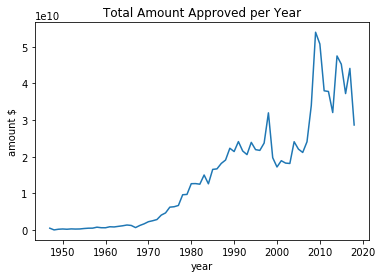

In [162]:
###
# TODO: Make a visualization with year on the x-axis and the sum of the totalamt columns per year on the y-axis
# HINT: The totalamt column is currently a string with commas. 
#         For example 100,250,364. You'll need to remove the
#         commas and convert the column to a numeric variable.
#
# HINT: pandas groupby, sum, and plot methods should also be helpful
####

import matplotlib.pyplot as plt
%matplotlib inline

df_projects['totalamt'] = pd.to_numeric(df_projects['totalamt'].str.replace(',',''))

ax = df_projects.groupby('approvalyear')['totalamt'].sum().plot(x='approvalyear', y='totalamt',
                                                          title ='Total Amount Approved per Year')
ax.set_xlabel('year')
ax.set_ylabel('amount $')
plt.show()

# 3.2.18 Matching Encodings

# 3.2.19 Matching Encodings Exercise

Encodings are a set of rules mapping string characters to their binary representations. Python supports dozens of different encoding as seen here in [this link](https://docs.python.org/3/library/codecs.html#standard-encodings).

The problem is that it's difficult to know what encoding rules were used to make a file unless somebody tells you. The most common encoding by far is utf-8.

In [1]:
import pandas as pd

path = '3.2 Class Notebooks/'

df = pd.read_csv(path + 'data/population_data.csv', skiprows=4)

In [6]:
path = '3.2 Class Notebooks/'
try:
    df = pd.read_csv(path + '9_encodings_exercise/mystery.csv')
except Exception as e:
    print("Error: {}".format(e))

Error: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte


In [9]:
# TODO: Figure out what the encoding is of the myster.csv file
# HINT: pd.read_csv('mystery.csv', encoding=?) where ? is the string for an encoding like 'ascii'
# HINT: This link has a list of encodings that Python recognizes https://docs.python.org/3/library/codecs.html#standard-encodings

# Python has a file containing a dictionary of encoding names and associated aliases
# This line imports the dictionary and then creates a set of all available encodings
# You can use this set of encodings to search for the correct encoding
# If you'd like to see what this file looks like, execute the following Python code to see where the file is located
#    from encodings import aliases
#    aliases.__file__

from encodings.aliases import aliases

alias_values = set(aliases.values())

# TODO: iterate through the alias_values list trying out the different encodings to see which one or ones work
# HINT: Use a try - except statement. Otherwise your code will produce an error when reading in the csv file
#       with the wrong encoding.
# HINT: In the try statement, print out the encoding name so that you know which one(s) worked.
for encoding in set(aliases.values()):
    try:
        df=pd.read_csv(path + '9_encodings_exercise/mystery.csv', encoding=encoding)
        print('successful', encoding)
    except:
        pass

successful utf_16_be
successful utf_16_le
successful utf_16


There is a Python library that can be of some help when you don't know an encoding: chardet.

In [10]:
# import the chardet library
import chardet 

# use the detect method to find the encoding
# 'rb' means read in the file as binary
with open(path + '9_encodings_exercise/mystery.csv', 'rb') as file:
    print(chardet.detect(file.read()))

{'encoding': 'UTF-16', 'confidence': 1.0, 'language': ''}


# 3.2.20 Missing Data - Overview

In the video, I say that a machine learning algorithm won't work with missing values. This is essentially correct; however, there are a couple of situations where this isn't quite true. For example, if you had a categorical variable, you could keep the NULL value as one of the options.

Like if theme_2 could have a value of agriculture, banking, or NULL, you might encode this variable as 0, 1, 2 where the value 2 stands in for the NULL value. You could do something similar for one-hot encoding where the theme_2 variable becomes 3 true/false features: theme_2_agriculture, theme_2_banking, theme_2_NULL. You could have to make sure that this improves your model performance.

There are also implementations of some machine learning algorithms, such as gradient boosting decision trees that can handle missing values.
- https://xgboost.readthedocs.io/en/latest/
- https://github.com/dmlc/xgboost/issues/21

# 3.2.21 Missing Data - Delete

# 3.2.22 Missing Data - Inpute

# 3.2.23 Imputation Exercise

In [11]:
import pandas as pd

path = '3.2 Class Notebooks/'
csv_path = path + 'data/gdp_data.csv'

df = pd.read_csv(csv_path, skiprows=4)
df.drop('Unnamed: 62', axis=1, inplace=True)

df.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              140
                 ... 
2013               16
2014               17
2015               18
2016               23
2017               30
Length: 62, dtype: int64

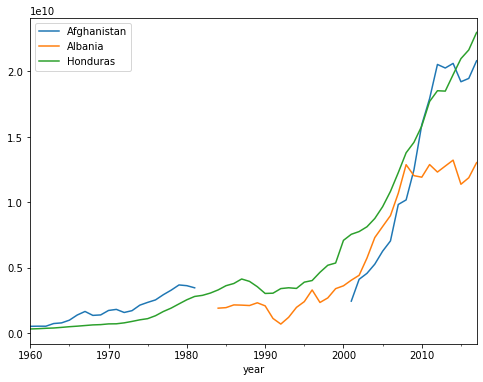

In [12]:
import matplotlib.pyplot as plt

# put the data set into long form instead of wide
df_melt = pd.melt(df, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='year', value_name='GDP')

# convert year to a date time
df_melt['year'] = pd.to_datetime(df_melt['year'])

def plot_results(column_name):
    # plot the results for Afghanistan, Albania, and Honduras
    fig, ax = plt.subplots(figsize=(8,6))

    df_melt[(df_melt['Country Name'] == 'Afghanistan') | 
            (df_melt['Country Name'] == 'Albania') | 
            (df_melt['Country Name'] == 'Honduras')].groupby('Country Name').plot('year', column_name, legend=True, ax=ax)
    ax.legend(labels=['Afghanistan', 'Albania', 'Honduras'])
    
plot_results('GDP')

Your first task is to calculate mean GDP for each country and fill in missing values with the country mean. This is a bit tricky to do in pandas. Here are a few links that should be helpful:
* https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.groupby.html
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.transform.html
* https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.fillna.html

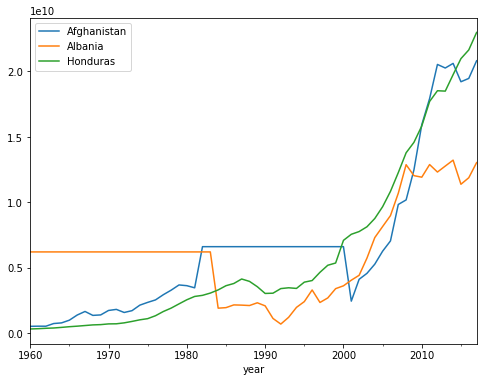

In [13]:
# TODO: Use the df_melt dataframe and fill in missing values with a country's mean GDP
# If you aren't sure how to do this, 
# look up something like "how to group data and fill in nan values in pandas" in a search engine
# Put the results in a new column called 'GDP_filled'.

# HINT: You can do this with these methods: groupby(), transform(), a lambda function, fillna(), and mean()

df_melt['GDP_filled'] = df_melt.groupby('Country Name')['GDP'].transform(lambda x: x.fillna(x.mean()))

plot_results('GDP_filled')

Use the fillna forward fill method to fill in the missing data. Here is the [documentation](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.fillna.html). As explained in the course video, forward fill takes previous values to fill in nulls.

The pandas fillna method has a forward fill option. For example, if you wanted to use forward fill on the GDP dataset, you could execute `df_melt['GDP'].fillna(method='ffill')`. However, there are two issues with that code. 
1. You want to first make sure the data is sorted by year
2. You need to group the data by country name so that the forward fill stays within each country

Write code to first sort the df_melt dataframe by year, then group by 'Country Name', and finally use the forward fill method.

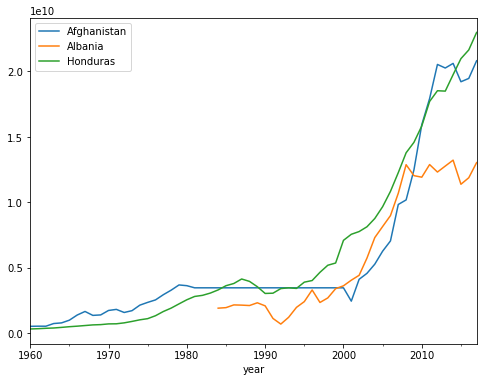

In [14]:
# TODO: Use forward fill to fill in missing GDP values
# HINTS: use the sort_values(), groupby(), and fillna() methods

df_melt['GDP_ffill'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].fillna(method='ffill')

plot_results('GDP_ffill')

This part is similar to Part 2, but now you will use backfill. Write code that backfills the missing GDP data.

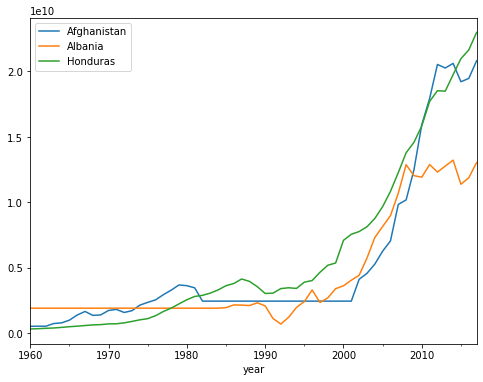

In [15]:
df_melt['GDP_bfill'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].fillna(method='bfill')

plot_results('GDP_bfill')

Note that forward fill did not fill all the Albania data because the first data entry in 1960 was NaN. Forward fill would try to fill the 1961 value with the NaN value from 1960.

Note as well that the results will be slightly different depending on if you run forward fill first or back fill first. Afghanistan, for example, is missing data in the middle of the data set. Hence forward fill and back fill will have slightly different results.

Run this next code cell to see if running both forward fill and back fill end up filling all the GDP NaN values.

In [17]:
# Run forward fill and backward fill on the GDP data
df_melt['GDP_ff_bf'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].fillna(method='ffill').fillna(method='bfill')

# Check if any GDP values are null
df_melt['GDP_ff_bf'].isnull().sum()

0

# 3.2.24 SQL, Optimization, and ETL

## Robert Chang from AirBnB
Take a break from all that coding and watch an interview excerpt with Robert Chang, a data scientist at AirBnB. Robert is a data scientist with a deep interest in data engineering. He starts talking about the importance of SQL and discusses optimizing ETL pipelines.

# 3.2.25 Duplicate Data

# 3.2.26 Duplicate Data

In [22]:
import pandas as pd

path = '3.2 Class Notebooks/'
csv_path = path + 'data/projects_data.csv'

# read in the projects data set and do some basic wrangling 
projects = pd.read_csv(csv_path, dtype=str)
projects.drop('Unnamed: 56', axis=1, inplace=True)
projects['totalamt'] = pd.to_numeric(projects['totalamt'].str.replace(',', ''))
projects['countryname'] = projects['countryname'].str.split(';', expand=True)[0]
projects['boardapprovaldate'] = pd.to_datetime(projects['boardapprovaldate'])

# TODO: filter the data frame for projects over 1 billion dollars
# TODO: count the number of unique countries in the results
projects[projects['totalamt'] > 1000000000]['countryname'].nunique()

17

Yugoslavia broke up into 7 countries: Bosnia and Herzegovina, Croatia, Kosovo, Macedonia, Montenegro, Serbia, and Slovenia. But the projects dataset has some ambiguity in how it treats Yugoslavia and the 7 countries that came from Yugoslavia. Your task is to find Yugoslavia projects that are probably represented multiple times in the data set.

In [23]:
# TODO: output all projects for the 'Socialist Federal Republic of Yugoslavia'
# HINT: You can use the exact country name or use the pandas str.contains() method to search for Yugoslavia
projects[projects['countryname'].str.contains('Yugoslavia')].head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme2name,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country
11166,P009285,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,PE,Specific Investment Loan,IN,A,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11410,P009231,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,PE,Sector Investment and Maintenance Loan,IN,B,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11479,P009219,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,PE,Structural Adjustment Loan,AD,C,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11694,P009225,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,PE,Sector Investment and Maintenance Loan,IN,C,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11695,P009275,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,PE,Specific Investment Loan,IN,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Yugoslavia officially ended on [April 27th, 1992](https://en.wikipedia.org/wiki/Yugoslavia). In the code cell below, filter for projects with a 'boardapprovaldate' prior to April 27th, 1992 **and** with 'countryname' Bosnia and Herzegovina, Croatia, Kosovo, Macedonia, Serbia **or** Slovenia.

# 3.2.27 Dummy Variables

## When to Remove a Feature
As mentioned in the video, if you have five categories, you only really need four features. For example, if the categories are "agriculture", "banking", "retail", "roads", and "government", then you only need four of those five categories for dummy variables. This topic is somewhat outside the scope of a data engineer.

In some cases, you don't necessarily need to remove one of the features. It will depend on your application. In regression models, which use linear combinations of features, removing a dummy variable is important. For a decision tree, removing one of the variables is not needed.

# 3.2.28 Dummy Variables Exercise

Pandas makes it very easy to create dummy variables with the [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) method. In this exercise, you'll create dummy variables from the World Bank projects data; however, there's a caveat. The World Bank data is not particularly clean, so you'll need to explore and wrangle the data first.

In [41]:
import numpy as np
import pandas as pd

path = '3.2 Class Notebooks/'
csv_path = path + 'data/projects_data.csv'

# read in the projects data set and do basic wrangling 
projects = pd.read_csv(csv_path, dtype=str)
projects.drop('Unnamed: 56', axis=1, inplace=True)
projects['totalamt'] = pd.to_numeric(projects['totalamt'].str.replace(',', ''))
projects['countryname'] = projects['countryname'].str.split(';', expand=True)[0]
projects['boardapprovaldate'] = pd.to_datetime(projects['boardapprovaldate'])

# keep the project name, lending, sector and theme data
sector = projects.copy()
sector = sector[['project_name', 'lendinginstr', 'sector1', 'sector2', 'sector3', 'sector4', 'sector5', 'sector',
          'mjsector1', 'mjsector2', 'mjsector3', 'mjsector4', 'mjsector5',
          'mjsector', 'theme1', 'theme2', 'theme3', 'theme4', 'theme5', 'theme ',
          'goal', 'financier', 'mjtheme1name', 'mjtheme2name', 'mjtheme3name',
          'mjtheme4name', 'mjtheme5name']]

# output percentage of values that are missing
100 * sector.isnull().sum() / sector.shape[0]

project_name      0.000000
lendinginstr      1.348093
sector1           0.000000
sector2          47.791539
sector3          64.450899
sector4          76.019290
sector5          85.132617
sector            3.496274
mjsector1       100.000000
mjsector2       100.000000
mjsector3       100.000000
mjsector4       100.000000
mjsector5       100.000000
mjsector          3.496274
theme1            0.000000
theme2           46.005042
theme3           58.987286
theme4           71.317405
theme5           83.954406
theme           100.000000
goal             33.510522
financier        61.310829
mjtheme1name    100.000000
mjtheme2name    100.000000
mjtheme3name    100.000000
mjtheme4name    100.000000
mjtheme5name    100.000000
dtype: float64

In [43]:
uniquesectors1 = list(sector['sector1'].sort_values().unique())
print('Number of unique values in sector1:', len(uniquesectors1))

# TODO: In the sector1 variable, replace the string '!$10' with nan
# HINT: you can use the pandas replace() method and numpy.nan
sector['sector1'] = sector['sector1'].replace('!$!0', np.nan)

# TODO: In the sector1 variable, remove the last 10 or 11 characters from the sector1 variable.
# HINT: There is more than one way to do this including the replace method
# HINT: You can use a regex expression '!.+'
# That regex expression looks for a string with an exclamation
# point followed by one or more characters

sector['sector1'] = sector['sector1'].replace('!.+', '', regex=True)

# TODO: Remove the string '(Historic)' from the sector1 variable
# HINT: You can use the replace method
sector['sector1'] = sector['sector1'].replace('^(\(Historic\))', '', regex=True)

print('Number of unique sectors after cleaning:', len(list(sector['sector1'].unique())))
print('Percentage of null values after cleaning:', 100 * sector['sector1'].isnull().sum() / sector['sector1'].shape[0])

Number of unique values in sector1: 3060
Number of unique sectors after cleaning: 156
Percentage of null values after cleaning: 3.4962735642262164


In [44]:
# TODO: Create dummy variables from the sector1_aggregates data. Put the results into a dataframe called dummies
# Hint: Use the get_dummies method
dummies = pd.DataFrame(pd.get_dummies(sector['sector1']))

# TODO: Filter the projects data for the totalamt, the year from boardapprovaldate, and the dummy variables
projects['year'] = projects['boardapprovaldate'].dt.year
df = projects[['totalamt','year']]
df_final = pd.concat([df, dummies], axis=1)

df_final.head()

,totalamt,year,Adult; Basic and Continuing Education,Agency reform,Agricultural Extension; Research; and Other Support Activities,Agricultural credit,Agricultural extension,Agricultural markets; commercialization and agri-business,Agriculture adjustment,Agro-industry,...,Urban environment,Urban housing,Urban management,Urban transport,Urban water supply,Vocational training,Waste Management,Water Supply,Water supply and sanitation adjustment,Workforce Development and Vocational Education
0,0,2018.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,200000000,2018.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,58330000,2018.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20000000,2018.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,100000000,2018.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
